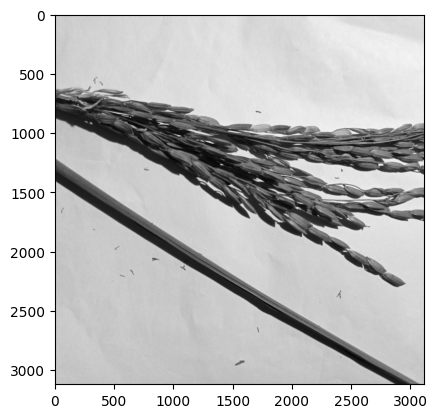

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 

DATADIR = "./BangladeshiCrops/Crop___Disease/Rice/"
CATEGORIES = ["Rice___Neck_Blast", "Rice___Leaf_Blast", "Rice___Healthy", "Rice___Brown_Spot"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [72]:
print(img_array.shape)

(3120, 3120)


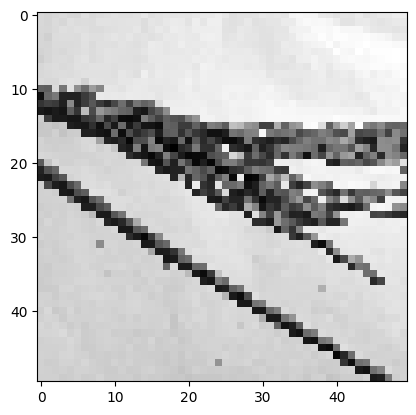

In [73]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show() 

In [74]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

#create_training_data()

In [75]:
print(len(training_data))

0


In [76]:
import random 

random.shuffle(training_data)

In [77]:
for sample in training_data[:10]:
    print(sample[1])

In [78]:
x = []
y = []

In [79]:
for features, label in training_data:
    x.append(features)
    y.append(label) 

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [80]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [81]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)